In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataname = "V1_Mouse_Kidney"
# dataname = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname = "V1_Mouse_Brain_Sagittal_Anterior"
dataname = "p20218_s001_L1"

samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
row = samples.loc[dataname]
counts = pd.read_csv(row["readzs_counts"],sep="\t",names=["barcode","chr","pos","strand","count","dataname","window"],usecols=["barcode", "pos", "window"])
meta = pd.read_csv(row["metadata"],sep="\t")
# merged = ci.merge(meta[["barcode","quadrant","circle"]],on="barcode")

In [4]:
merged = counts.merge(meta[["cell_id","plot_xcoord","plot_ycoord"]],left_on="barcode",right_on="cell_id")

In [5]:
# window = "chr8_11013_plus" # Gpm6a

# window = "chr11_10983_plus" # Gpx3

# window = "chr17_16275_minus" # slc8a1

# window = "chr4_23431_minus" # rps8

# window = "chr5_28581_minus" # actb

window = "chr1_30673_plus" # S100A9

In [6]:
window_df = merged[merged["window"] == window]

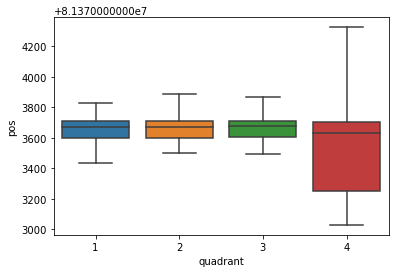

In [59]:
sns.boxplot(x="quadrant", y="pos",data=window_df,showfliers = False)
plt.show()

In [7]:
window_df["avg_pos"] = window_df["barcode"].map(window_df.groupby("barcode")["pos"].mean())
window_df["avg_pos_quant"] = pd.qcut(window_df["avg_pos"],4,labels=False)

/home/users/jolivier/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


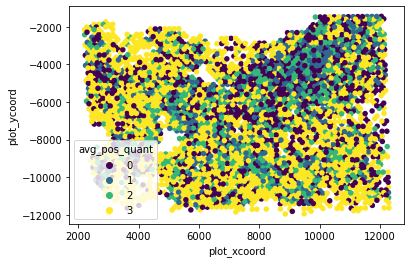

In [8]:
sns.scatterplot(data = window_df.drop_duplicates("barcode"), x = "plot_xcoord", y = "plot_ycoord", hue = "avg_pos_quant",s=30,linewidth=0,palette="viridis",legend=True)
plt.show()

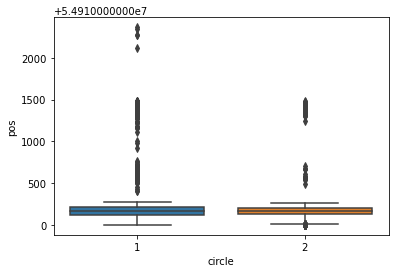

In [13]:
sns.boxplot(x="circle", y="pos",data=window_df)
plt.show()

In [14]:
meta.head()

,barcode,in_tissue,array_row,array_col,xcoord,ycoord,cell_id,plot_xcoord,plot_ycoord,pixval,pixquant,quadrant,circle,dist_from_center
0,TGGGACCATTGGGAGT-1,1,7,5,2257,1776,V1_Mouse_Brain_Sagittal_Posterior_TGGGACCATTGG...,1776,-2257,148,9,2,1,5636.752611
1,CCGGTGCGAGTGATAG-1,1,7,7,2257,1914,V1_Mouse_Brain_Sagittal_Posterior_CCGGTGCGAGTG...,1914,-2257,141,8,2,1,5536.387992
2,TAGCCAGAGGGTCCGG-1,1,7,9,2257,2052,V1_Mouse_Brain_Sagittal_Posterior_TAGCCAGAGGGT...,2052,-2257,138,6,2,1,5437.673400
3,GAAGGGCATAACCATG-1,1,7,11,2257,2189,V1_Mouse_Brain_Sagittal_Posterior_GAAGGGCATAAC...,2189,-2257,134,4,2,1,5341.396540
4,CAACATGGCCTGATAA-1,1,6,12,2137,2258,V1_Mouse_Brain_Sagittal_Posterior_CAACATGGCCTG...,2258,-2137,154,9,2,1,5381.135196


In [5]:
row["readzs_counts"]

'/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/V1_Mouse_Brain_Sagittal_Posterior/counts/V1_Mouse_Brain_Sagittal_Posterior_all_counts.txt'

,barcode,pos,window
0,V1_Mouse_Brain_Sagittal_Posterior_CTCGAGGCAAGT...,3216995,chr15_644_minus
1,V1_Mouse_Brain_Sagittal_Posterior_GTCACTCTCCAA...,3217007,chr15_644_minus
2,V1_Mouse_Brain_Sagittal_Posterior_CCATTGTTTCCT...,3217007,chr15_644_minus
3,V1_Mouse_Brain_Sagittal_Posterior_TTGGTTCGCTCA...,3217008,chr15_644_minus
4,V1_Mouse_Brain_Sagittal_Posterior_CGTTGCCCGCGT...,3217008,chr15_644_minus
